# Son Heung-min Shot Map (2015-2025)
This notebook charts Son's shot attempt across 10 seasons in the Premier League using Python and mplsoccer. It includes both static visuals and animated shot maps.

## Part I: Load the libraries

In [1]:
import pandas as pd
import numpy as np
import understatapi
import mplsoccer
from mplsoccer import PyPizza, FontManager, add_image, VerticalPitch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import matplotlib.font_manager as font_manager
import imageio.v2 as imageio
import os
from PIL import Image
from urllib.request import urlopen

## Part II: Scrape public data for Son Heung-min

Steps:

* Load the data from understat using understatapi
* Filter the data using the columns 'h_team' and 'a_team' - where either of these column contains 'Tottenham'
* Save the dataframe into a CSV file
* Clean up the data - also use reset_index()
* The 'X' and 'Y' column should be multiplied by 100 since OPTA's pitch template in mplsoccer use coordinates between 0-100
* Additional calculations will be needed to create these metrics: total shots, total goals, total xG, xG per shot, average distance of shot

In [2]:
# Initialize an API client from understat to access Son's shooting data
client = understatapi.UnderstatClient()

# Load the font and set the background color
font_path = '/Users/jasonrobert/Downloads/Arvo/Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)
background_color = '#EEECE7'

In [3]:
# Load the player's shot data by specifying the player ID from understat
son = client.player(player='453').get_shot_data()
son

[{'id': '24377',
  'minute': '53',
  'result': 'BlockedShot',
  'X': '0.89',
  'Y': '0.629000015258789',
  'xG': '0.08518020063638687',
  'player': 'Son Heung-Min',
  'h_a': 'a',
  'player_id': '453',
  'situation': 'OpenPlay',
  'season': '2014',
  'shotType': 'LeftFoot',
  'match_id': '5453',
  'h_team': 'Borussia Dortmund',
  'a_team': 'Bayer Leverkusen',
  'h_goals': '0',
  'a_goals': '2',
  'date': '2014-08-23 17:30:00',
  'player_assisted': 'Stefan Kießling',
  'lastAction': 'HeadPass'},
 {'id': '24858',
  'minute': '72',
  'result': 'Goal',
  'X': '0.8040000152587891',
  'Y': '0.3920000076293945',
  'xG': '0.038718998432159424',
  'player': 'Son Heung-Min',
  'h_a': 'h',
  'player_id': '453',
  'situation': 'OpenPlay',
  'season': '2014',
  'shotType': 'LeftFoot',
  'match_id': '5411',
  'h_team': 'Bayer Leverkusen',
  'a_team': 'Werder Bremen',
  'h_goals': '3',
  'a_goals': '3',
  'date': '2014-09-12 19:30:00',
  'player_assisted': 'Tin Jedvaj',
  'lastAction': 'Pass'},
 {'id'

In [4]:
# Save the dictionary into a Pandas dataframe then check if the data looks good
son_shot = pd.DataFrame(son)
son_shot.tail(10)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
781,618441,45,BlockedShot,0.8519999694824218,0.6580000305175782,0.08556574583053589,Son Heung-Min,a,453,OpenPlay,2024,RightFoot,26857,Ipswich,Tottenham,1,4,2025-02-22 15:00:00,Dejan Kulusevski,Pass
782,619587,83,SavedShot,0.875999984741211,0.4179999923706055,0.08932241797447205,Son Heung-Min,h,453,OpenPlay,2024,RightFoot,26865,Tottenham,Manchester City,0,1,2025-02-26 19:30:00,Brennan Johnson,Pass
783,621810,53,BlockedShot,0.825,0.6480000305175782,0.040160417556762695,Son Heung-Min,h,453,OpenPlay,2024,RightFoot,26879,Tottenham,Bournemouth,2,2,2025-03-09 14:00:00,Pape Sarr,Pass
784,621823,83,Goal,0.885,0.5,0.7611688375473022,Son Heung-Min,h,453,Penalty,2024,RightFoot,26879,Tottenham,Bournemouth,2,2,2025-03-09 14:00:00,None,Standard
785,623248,82,BlockedShot,0.9290000152587891,0.6790000152587891,0.06487483531236649,Son Heung-Min,a,453,OpenPlay,2024,LeftFoot,26886,Fulham,Tottenham,2,0,2025-03-16 13:30:00,Iyenoma Destiny Udogie,Pass
786,625250,1,BlockedShot,0.905,0.6769999694824219,0.0875883623957634,Son Heung-Min,a,453,OpenPlay,2024,LeftFoot,26897,Chelsea,Tottenham,1,0,2025-04-03 19:00:00,Iyenoma Destiny Udogie,Pass
787,625266,88,SavedShot,0.9619999694824218,0.585,0.6265213489532471,Son Heung-Min,a,453,OpenPlay,2024,LeftFoot,26897,Chelsea,Tottenham,1,0,2025-04-03 19:00:00,Brennan Johnson,Pass
788,626212,52,BlockedShot,0.9030000305175782,0.6940000152587891,0.13604244589805603,Son Heung-Min,h,453,OpenPlay,2024,LeftFoot,26910,Tottenham,Southampton,3,1,2025-04-06 13:00:00,James Maddison,Chipped
789,633513,88,BlockedShot,0.870999984741211,0.5940000152587891,0.1223771944642067,Son Heung-Min,h,453,OpenPlay,2024,LeftFoot,26960,Tottenham,Crystal Palace,0,2,2025-05-11 13:15:00,Mathys Tel,Pass
790,634222,14,MissedShots,0.86,0.7369999694824219,0.053606558591127396,Son Heung-Min,a,453,OpenPlay,2024,RightFoot,26963,Aston Villa,Tottenham,2,0,2025-05-16 18:30:00,Wilson Odobert,Pass


In [5]:
# Preview the 'situation' column to check how many goals scored from penalties
# Penalties won't be included in this analysis and visualization
son_shot['situation'].value_counts()

situation
OpenPlay          695
FromCorner         51
SetPiece           25
DirectFreekick     14
Penalty             6
Name: count, dtype: int64

In [6]:
# Filter the data for shots taken only with Tottenham and exclude penalties
son_shot_tot = son_shot[
    ((son_shot['h_team'].str.contains('Tottenham', na=False)) | 
     (son_shot['a_team'].str.contains('Tottenham', na=False))) &
    (son_shot['situation'] != 'Penalty')
].copy()

son_shot_tot

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
65,57945,18,BlockedShot,0.7219999694824218,0.5309999847412109,0.016368599608540535,Son Heung-Min,a,453,OpenPlay,2015,RightFoot,128,Sunderland,Tottenham,0,1,2015-09-13 16:30:00,Ben Davies,Pass
66,57950,37,MissedShots,0.7519999694824219,0.30100000381469727,0.01766270026564598,Son Heung-Min,a,453,OpenPlay,2015,LeftFoot,128,Sunderland,Tottenham,0,1,2015-09-13 16:30:00,Ryan Mason,Pass
67,58296,2,BlockedShot,0.74,0.54,0.017025399953126907,Son Heung-Min,h,453,OpenPlay,2015,RightFoot,138,Tottenham,Crystal Palace,1,0,2015-09-20 16:30:00,Ben Davies,TakeOn
68,58299,11,BlockedShot,0.789000015258789,0.5220000076293946,0.034012001007795334,Son Heung-Min,h,453,OpenPlay,2015,RightFoot,138,Tottenham,Crystal Palace,1,0,2015-09-20 16:30:00,Nacer Chadli,Pass
69,58304,26,BlockedShot,0.8009999847412109,0.5929999923706055,0.031564999371767044,Son Heung-Min,h,453,OpenPlay,2015,RightFoot,138,Tottenham,Crystal Palace,1,0,2015-09-20 16:30:00,Nacer Chadli,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,625250,1,BlockedShot,0.905,0.6769999694824219,0.0875883623957634,Son Heung-Min,a,453,OpenPlay,2024,LeftFoot,26897,Chelsea,Tottenham,1,0,2025-04-03 19:00:00,Iyenoma Destiny Udogie,Pass
787,625266,88,SavedShot,0.9619999694824218,0.585,0.6265213489532471,Son Heung-Min,a,453,OpenPlay,2024,LeftFoot,26897,Chelsea,Tottenham,1,0,2025-04-03 19:00:00,Brennan Johnson,Pass
788,626212,52,BlockedShot,0.9030000305175782,0.6940000152587891,0.13604244589805603,Son Heung-Min,h,453,OpenPlay,2024,LeftFoot,26910,Tottenham,Southampton,3,1,2025-04-06 13:00:00,James Maddison,Chipped
789,633513,88,BlockedShot,0.870999984741211,0.5940000152587891,0.1223771944642067,Son Heung-Min,h,453,OpenPlay,2024,LeftFoot,26960,Tottenham,Crystal Palace,0,2,2025-05-11 13:15:00,Mathys Tel,Pass


In [7]:
# Filter for non-penalty goals and check the amount of non-penalty goals is correct
non_penalty_goals = son_shot_tot[(son_shot_tot['result'] == 'Goal')]
print(f"Non-penalty goals: {len(non_penalty_goals)}")

Non-penalty goals: 123


In [8]:
# Reset the index for the filtered dataframe
son_shot_tot = son_shot_tot.reset_index(drop=True)

In [9]:
# Save the dataframe to a CSV file
son_shot_tot.to_csv('/Users/jasonrobert/Desktop/son/son_shot_tot.csv', index=False)

In [10]:
# Load the CSV file save it as 'df' dataframe
df_son = pd.read_csv('/Users/jasonrobert/Desktop/son/son_shot_tot.csv')
df_son.head(10)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,57945,18,BlockedShot,0.722,0.531,0.016369,Son Heung-Min,a,453,OpenPlay,2015,RightFoot,128,Sunderland,Tottenham,0,1,2015-09-13 16:30:00,Ben Davies,Pass
1,57950,37,MissedShots,0.752,0.301,0.017663,Son Heung-Min,a,453,OpenPlay,2015,LeftFoot,128,Sunderland,Tottenham,0,1,2015-09-13 16:30:00,Ryan Mason,Pass
2,58296,2,BlockedShot,0.740,0.540,0.017025,Son Heung-Min,h,453,OpenPlay,2015,RightFoot,138,Tottenham,Crystal Palace,1,0,2015-09-20 16:30:00,Ben Davies,TakeOn
3,58299,11,BlockedShot,0.789,0.522,0.034012,Son Heung-Min,h,453,OpenPlay,2015,RightFoot,138,Tottenham,Crystal Palace,1,0,2015-09-20 16:30:00,Nacer Chadli,Pass
4,58304,26,BlockedShot,0.801,0.593,0.031565,Son Heung-Min,h,453,OpenPlay,2015,RightFoot,138,Tottenham,Crystal Palace,1,0,2015-09-20 16:30:00,Nacer Chadli,Pass
5,58316,57,SavedShot,0.919,0.292,0.044088,Son Heung-Min,h,453,OpenPlay,2015,RightFoot,138,Tottenham,Crystal Palace,1,0,2015-09-20 16:30:00,Erik Lamela,Pass
6,58321,67,Goal,0.880,0.684,0.080438,Son Heung-Min,h,453,OpenPlay,2015,LeftFoot,138,Tottenham,Crystal Palace,1,0,2015-09-20 16:30:00,Christian Eriksen,Pass
7,58507,25,SavedShot,0.905,0.697,0.096129,Son Heung-Min,h,453,OpenPlay,2015,LeftFoot,141,Tottenham,Manchester City,4,1,2015-09-26 15:45:00,Christian Eriksen,Throughball
8,58517,44,SavedShot,0.939,0.489,0.563632,Son Heung-Min,h,453,OpenPlay,2015,LeftFoot,141,Tottenham,Manchester City,4,1,2015-09-26 15:45:00,Kyle Walker,Pass
9,55068,35,SavedShot,0.859,0.548,0.123459,Son Heung-Min,h,453,OpenPlay,2015,RightFoot,209,Tottenham,West Ham,4,1,2015-11-22 20:00:00,Dele Alli,Pass


In [11]:
# Change the dimensions of X and Y coordinates
df_son['X'] = df_son['X'] * 100
df_son['Y'] = df_son['Y'] * 100

In [12]:
# We need to do some calculations that will be used for annotations in the charts
total_shots = df_son.shape[0]
total_goals = df_son[df_son['result'] == 'Goal'].shape[0]
total_xg = df_son['xG'].sum()
xg_per_shot = total_xg/total_shots
points_average_distance = df_son['X'].mean()
actual_average_distance = 120 - (df_son['X'] * 1.2).mean()

#total_shots = len(df)  # Total shots (all rows in the original DataFrame)
#total_goals = len(son_goals)  # Total goals (rows where result is 'Goal')
#total_xg = df['xG'].sum()  # Total xG (sum of xG values for all shots)
#xg_per_shot = total_xg / total_shots if total_shots != 0 else 0  # xG per shot

In [13]:
actual_average_distance

np.float64(16.97933330217998)

In [14]:
# Filter where the result of the shot is a goal - the goals will be plotted into the shot map
son_goals = df_son[df_son['result'] == 'Goal']
son_goals

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
6,58321,67,Goal,88.000000,68.400002,0.080438,Son Heung-Min,h,453,OpenPlay,2015,LeftFoot,138,Tottenham,Crystal Palace,1,0,2015-09-20 16:30:00,Christian Eriksen,Pass
18,54120,88,Goal,96.900002,41.299999,0.101374,Son Heung-Min,a,453,OpenPlay,2015,RightFoot,262,Watford,Tottenham,1,2,2015-12-28 19:00:00,Kieran Trippier,Cross
35,56954,43,Goal,89.500000,38.400002,0.359653,Son Heung-Min,a,453,OpenPlay,2015,RightFoot,436,Chelsea,Tottenham,2,2,2016-05-02 23:00:00,Christian Eriksen,Throughball
37,56852,15,Goal,96.300003,46.000000,0.955841,Son Heung-Min,h,453,OpenPlay,2015,LeftFoot,444,Tottenham,Southampton,1,2,2016-05-08 16:30:00,Erik Lamela,TakeOn
38,113314,40,Goal,89.500000,43.700001,0.379793,Son Heung-Min,a,453,OpenPlay,2016,LeftFoot,493,Stoke,Tottenham,0,4,2016-09-10 18:00:00,Christian Eriksen,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,586118,76,Goal,95.800003,65.000000,0.288310,Son Heung-Min,h,453,OpenPlay,2024,LeftFoot,26617,Tottenham,Everton,4,0,2024-08-24 14:00:00,Micky van de Ven,Pass
675,596738,59,Goal,91.699997,66.199997,0.113232,Son Heung-Min,h,453,OpenPlay,2024,LeftFoot,26672,Tottenham,West Ham,4,1,2024-10-19 11:30:00,Pape Sarr,Pass
687,606528,95,Goal,91.599998,49.599998,0.468548,Son Heung-Min,h,453,FromCorner,2024,RightFoot,26745,Tottenham,Chelsea,3,4,2024-12-08 16:30:00,James Maddison,Pass
689,607777,11,Goal,92.599998,63.000000,0.378956,Son Heung-Min,a,453,OpenPlay,2024,LeftFoot,26759,Southampton,Tottenham,0,5,2024-12-15 19:00:00,NaN,NaN


In [15]:
son_goals['situation'].value_counts()

situation
OpenPlay          114
SetPiece            4
FromCorner          4
DirectFreekick      1
Name: count, dtype: int64

## Part III: Create Son's shot map
The first plot will plot all of Son's shots and goals in the Premier League. With a structure of:
* Header:
    * Player name in the middle, player portrait on the left and team logo on the right
    * All shots and goals in the Premier League 2015-2025
    * Chance indicators
* Main section:
    * Shot map
* Footer:
    * Annotations to specify the number of shots, goals, xG, and xG per shot

Text(0.01, 0.15, 'Data: understat.com\nGraphic by jsonrbrbt.bsky.social')

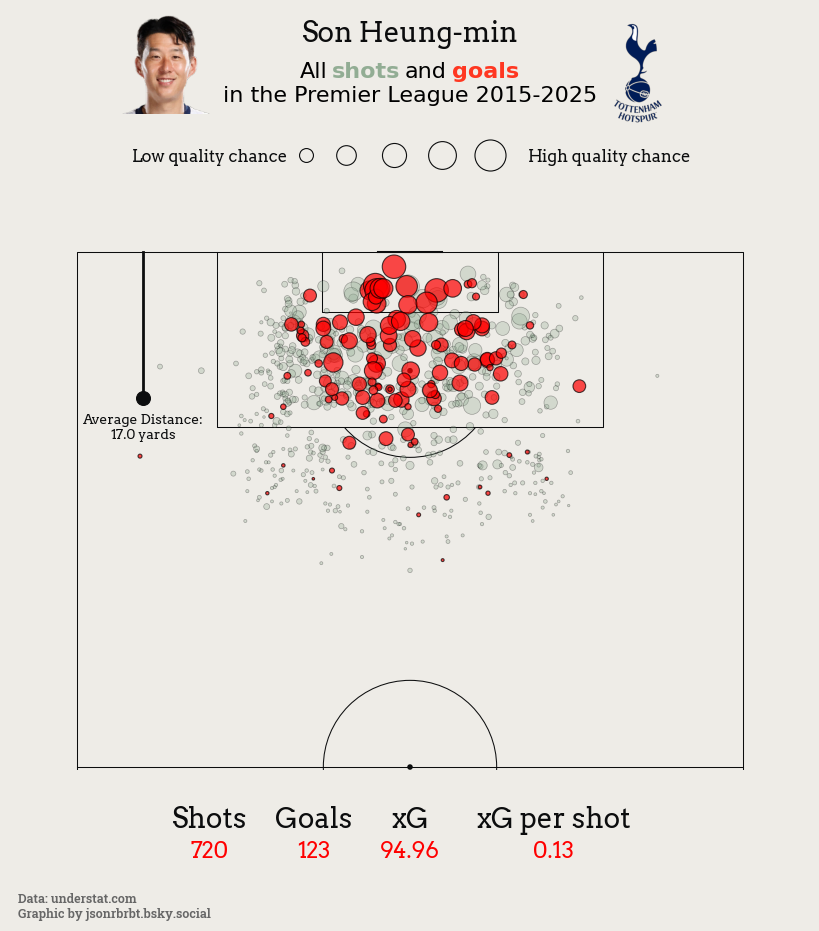

In [16]:
# --------------------------
# Son Heung-min Shot Map (Overall)
# --------------------------

# 1. Load Images
img = mpimg.imread('photos/son_face.webp')
tot = mpimg.imread('photos/tottenham_logo.png')

# 2. Set Up Figure
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

# 3. Header Section: Title, Player Image, Legend
ax1 = fig.add_axes([0, 0.7, 1, 0.2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

# Add Son's Image and Tottenham Logo
add_image(img, fig, left=0.13, bottom=0.8, width=0.13, height=0.127)
add_image(tot, fig, left=0.72, bottom=0.789, width=0.13, height=0.13)

# Title Text
ax1.text(0.5, 0.90, 'Son Heung-min', fontproperties=font_props, fontsize=20, fontweight='bold', color='#0C0D0E', ha='center')

# Subtitle Line with Mixed Colors
ax1.text(0.38, 0.75, 'All', fontsize=16, fontweight='light', ha='center', color='black')
ax1.text(0.445, 0.75, 'shots', fontsize=16, fontweight='bold', ha='center', color='#92AD94')
ax1.text(0.52, 0.75, 'and', fontsize=16, fontweight='light', ha='center', color='black')
ax1.text(0.595, 0.75, 'goals', fontsize=16, fontweight='bold', ha='center', color='#FF3721')
ax1.text(0.5, 0.65, 'in the Premier League 2015-2025', fontsize=16, fontweight='light', ha='center', color='black')

# xG Shot Size Legend
ax1.text(0.25, 0.4, 'Low quality chance', fontproperties=font_props, fontsize=12, fontweight='bold', color='#0C0D0E', ha='center')
sizes = [100, 200, 300, 400, 500]
x_positions = [0.37, 0.42, 0.48, 0.54, 0.6]
for x_pos, size in zip(x_positions, sizes):
    ax1.scatter(x=x_pos, y=0.43, s=size, color=background_color, edgecolor='#0C0D0E', linewidth=0.8)
ax1.text(0.75, 0.4, 'High quality chance', fontproperties=font_props, fontsize=12, fontweight='bold', color='#0C0D0E', ha='center')

# 4. Middle Section: Pitch + Shots
ax2 = fig.add_axes([0.05, 0.25, 0.9, 0.5])
ax2.set_facecolor(background_color)

pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=0.5,
    line_color='#0C0D0E',
    linewidth=0.75,
    axis=True,
    label=True
)
pitch.draw(ax=ax2)

# Average Distance Line and Label
ax2.scatter(x=90, y=points_average_distance, s=100, color='#0C0D0E', linewidth=0.8)
ax2.plot([90, 90], [100, points_average_distance], color='#0C0D0E', linewidth=2)
ax2.text(
    x=90, y=points_average_distance - 4,
    s=f'Average Distance:\n{actual_average_distance:.1f} yards',
    fontsize=10, fontproperties=font_props, color='#0C0D0E', ha='center'
)

# Plot Non-goal Shots
non_goals_df = df_son[df_son['result'] != 'Goal']
pitch.scatter(
    non_goals_df['X'],
    non_goals_df['Y'],
    s=300 * non_goals_df['xG'],
    color='#92AD94',
    edgecolor='black',
    linewidth=0.5,
    alpha=0.3,
    ax=ax2,
    zorder=1
)

# Plot Goals (Vectorized)
son_goals_df = df_son[df_son['result'] == 'Goal']
pitch.scatter(
    son_goals_df['X'],
    son_goals_df['Y'],
    s=300 * son_goals_df['xG'],
    color='red',
    edgecolor='black',
    linewidth=0.8,
    alpha=0.7,
    ax=ax2,
    zorder=2
)

# 5. Footer Section: Summary Stats
ax3 = fig.add_axes([0, 0.2, 1, 0.05])
ax3.set_facecolor(background_color)

footer_labels = ['Shots', 'Goals', 'xG', 'xG per shot']
footer_values = [total_shots, total_goals, f'{total_xg:.2f}', f'{xg_per_shot:.2f}']
footer_positions = [0.25, 0.38, 0.50, 0.68]

for x, label, value in zip(footer_positions, footer_labels, footer_values):
    ax3.text(x=x, y=0.5, s=label, fontsize=20, fontproperties=font_props, fontweight='bold', color='#0C0D0E', ha='center')
    ax3.text(x=x, y=0, s=str(value), fontsize=16, fontproperties=font_props, color='red', ha='center')

# 6. Turn Off Axes
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

# 7. Credits
fig.text(
    0.01, 0.15,
    "Data: understat.com\nGraphic by jsonrbrbt.bsky.social",
    size=9, fontfamily="Roboto Slab", color="#666666", ha="left"
)

### Creating multiple shot maps for Son Heung-min with dynamic images

We follow a similar process to the above with the addition of:
* Creating a dictionary for Son's photos that will be displayed in each shot map
* Use a for loop to create a shot map for each season

Data from:
* Shot data: https://understat.com/player/453
* Player photos in shot map: https://sofifa.com/player/200104/heung-min-son/
* Player photos (cover and end): Sporting News and The Athletic

In [17]:
son_images = {
    2015: "/Users/jasonrobert/Jupyter Notebook/Football/son_shotmap/photos/son_15.webp",
    2016: "/Users/jasonrobert/Jupyter Notebook/Football/son_shotmap/photos/son_16.webp",
    2017: "/Users/jasonrobert/Jupyter Notebook/Football/son_shotmap/photos/son_17.webp",
    2018: "/Users/jasonrobert/Jupyter Notebook/Football/son_shotmap/photos/son_18.webp",
    2019: "/Users/jasonrobert/Jupyter Notebook/Football/son_shotmap/photos/son_19.webp",
    2020: "/Users/jasonrobert/Jupyter Notebook/Football/son_shotmap/photos/son_20.webp",
    2021: "/Users/jasonrobert/Jupyter Notebook/Football/son_shotmap/photos/son_21.webp",
    2022: "/Users/jasonrobert/Jupyter Notebook/Football/son_shotmap/photos/son_22.webp",
    2023: "/Users/jasonrobert/Jupyter Notebook/Football/son_shotmap/photos/son_23.webp",
    2024: "/Users/jasonrobert/Jupyter Notebook/Football/son_shotmap/photos/son_24.webp"
}

In [18]:
# -- Setup Paths --
image_dir = "photos"
output_dir = os.path.join(image_dir, "output")
os.makedirs(output_dir, exist_ok=True)  # Create output directory if missing

# -- Son Season Images --
son_images = {
    2015: os.path.join(image_dir, "son_15.webp"),
    2016: os.path.join(image_dir, "son_16.webp"),
    2017: os.path.join(image_dir, "son_17.webp"),
    2018: os.path.join(image_dir, "son_18.webp"),
    2019: os.path.join(image_dir, "son_19.webp"),
    2020: os.path.join(image_dir, "son_20.webp"),
    2021: os.path.join(image_dir, "son_21.webp"),
    2022: os.path.join(image_dir, "son_22.webp"),
    2023: os.path.join(image_dir, "son_23.webp"),
    2024: os.path.join(image_dir, "son_24.webp")
}

# -- Load Tottenham Logo --
tot = mpimg.imread(os.path.join(image_dir, "tottenham_logo.png"))

# -- Ensure numeric types for plotting --
df_son[['X', 'Y', 'xG']] = df_son[['X', 'Y', 'xG']].apply(pd.to_numeric, errors='coerce')
df_son.dropna(subset=['X', 'Y', 'xG'], inplace=True)

# -- Unique Seasons --
seasons = df_son['season'].unique()

# -- Loop through each season --
for season in seasons:
    season_data = df_son[df_son['season'] == season]
    formatted_season = f"{season}/{str(season + 1)[-2:]}"
    
    # Load image (with fallback)
    img_path = son_images.get(season, os.path.join(image_dir, "default_son.webp"))
    img = mpimg.imread(img_path)

    # Filter shots
    son_goals = season_data[season_data['result'] == 'Goal']
    non_goals = season_data[season_data['result'] != 'Goal']

    # Calculate stats
    total_shots = len(season_data)
    total_goals = len(son_goals)
    total_xg = season_data['xG'].sum()
    xg_per_shot = total_xg / total_shots if total_shots > 0 else 0
    points_average_distance = season_data['X'].mean()
    actual_average_distance = 120 - (season_data['X'] * 1.2).mean()

    # --- Create Figure ---
    fig = plt.figure(figsize=(8, 12))
    fig.patch.set_facecolor(background_color)

    # -- Top Title Area --
    ax1 = fig.add_axes([0, 0.7, 1, 0.2])
    ax1.set_facecolor(background_color)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    # Add Images
    add_image(img, fig, left=0.13, bottom=0.8, width=0.13, height=0.127)
    add_image(tot, fig, left=0.72, bottom=0.789, width=0.13, height=0.13)

    # Add Text Titles
    ax1.text(0.5, 0.85, 'Son Heung-min', fontproperties=font_props, fontsize=20, fontweight='bold', color='#0C0D0E', ha='center')
    ax1.text(0.5, 0.65, 'All goals in the Premier League', fontproperties=font_props, fontsize=14, fontweight='bold', color='#5E6472', ha='center')

    # Shot Size Legend
    sizes = [100, 200, 300, 400, 500]
    x_positions = [0.37, 0.42, 0.48, 0.54, 0.6]
    for x_pos, size in zip(x_positions, sizes):
        ax1.scatter(x=x_pos, y=0.43, s=size, color=background_color, edgecolor='#0C0D0E', linewidth=0.8)

    ax1.text(0.25, 0.4, 'Low quality chance', fontproperties=font_props, fontsize=12, fontweight='bold', color='#0C0D0E', ha='center')
    ax1.text(0.75, 0.4, 'High quality chance', fontproperties=font_props, fontsize=12, fontweight='bold', color='#0C0D0E', ha='center')

    # -- Pitch and Shots --
    ax2 = fig.add_axes([0.05, 0.25, 0.9, 0.5])
    ax2.set_facecolor(background_color)

    pitch = VerticalPitch(
        pitch_type='opta',
        half=True,
        pitch_color=background_color,
        pad_bottom=0.5,
        line_color='#0C0D0E',
        linewidth=0.75,
        axis=True,
        label=True
    )
    pitch.draw(ax=ax2)

    # Average Distance Line
    ax2.scatter(x=90, y=points_average_distance, s=100, color='#0C0D0E', linewidth=0.8)
    ax2.plot([90, 90], [100, points_average_distance], color='#0C0D0E', linewidth=2)
    ax2.text(x=90, y=points_average_distance - 4, s=f'Average Distance:\n{actual_average_distance:.1f} yards', fontsize=10, fontproperties=font_props, color='#0C0D0E', ha='center')

    # Season Label
    ax2.text(50, 65, formatted_season, ha='center', va='center', fontproperties=font_props, fontsize=40, fontweight='bold', color='#0C0D0E')

    # Plot Non-Goals
    pitch.scatter(
        non_goals['X'],
        non_goals['Y'],
        s=300 * non_goals['xG'],
        color='#92AD94',
        edgecolor='black',
        linewidth=0.5,
        alpha=0.3,
        ax=ax2,
        zorder=1
    )

    # Plot Goals
    pitch.scatter(
        son_goals['X'],
        son_goals['Y'],
        s=300 * son_goals['xG'],
        color='red',
        edgecolor='black',
        linewidth=0.8,
        alpha=0.7,
        ax=ax2
    )

    # -- Bottom Stats Bar --
    ax3 = fig.add_axes([0, 0.2, 1, 0.05])
    ax3.set_facecolor(background_color)

    ax3.text(0.25, 0.5, 'Shots', fontsize=20, fontproperties=font_props, fontweight='bold', color='#0C0D0E', ha='center')
    ax3.text(0.25, 0, f'{total_shots}', fontsize=16, fontproperties=font_props, color='red', ha='center')

    ax3.text(0.38, 0.5, 'Goals', fontsize=20, fontproperties=font_props, fontweight='bold', color='#0C0D0E', ha='center')
    ax3.text(0.38, 0, f'{total_goals}', fontsize=16, fontproperties=font_props, color='red', ha='center')

    ax3.text(0.50, 0.5, 'xG', fontsize=20, fontproperties=font_props, fontweight='bold', color='#0C0D0E', ha='center')
    ax3.text(0.50, 0, f'{total_xg:.2f}', fontsize=16, fontproperties=font_props, color='red', ha='center')

    ax3.text(0.68, 0.5, 'xG per shot', fontsize=20, fontproperties=font_props, fontweight='bold', color='#0C0D0E', ha='center')
    ax3.text(0.68, 0, f'{xg_per_shot:.2f}', fontsize=16, fontproperties=font_props, color='red', ha='center')

    # Hide axes
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')

    # -- Credits --
    fig.text(0.01, 0.15, "Data: understat.com\nGraphic by jsonrbrbt.bsky.social", size=8, fontfamily="Roboto Slab", color="#666666", ha="left")

    # Save Figure
    output_path = os.path.join(output_dir, f"son_shot_map_{season}.png")
    fig.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close(fig)


In [19]:
# Create a list of image file paths (sorted by season)
image_files = [f"photos/output/son_shot_map_{season}.png" for season in sorted(seasons) if os.path.exists(f"photos/output/son_shot_map_{season}.png")]

# Load images
images = [imageio.imread(file) for file in image_files]

# Save GIF
imageio.mimsave('son_seasonal_shot_map.gif', images, duration=1500)  # 1500 milliseconds = 1.5 second per frame

Son has been a productive player for Tottenham, scoring in double figures in eight out of ten seasons of his tenure (the only exception were his first and most recent season with Spurs). His volume of shots have also been consistent, averaging an average of 78 shots per season. Since he didn't have the luxury of padding his stats by taking penalties, with Harry Kane being the club's primary penalty taker, this suggest that Son is a potent offensive threat in open play.

At his most productive, Son scores a lot of goals from inside the box, primarily in central locations, dovetailing nicely wuth Kane, who tends to drop deeper in build-up play. Son uses his burst of speed to get in central areas and finish off chances.

The most recent season might give the Spurs higher up a conundrum whether Son is about to regress in a major fashion. Along with a much reduced output - averaging a career low in npxG per 90, shots per 90 and shots on target per 90 - Son also only played 2110 minutes (his lowest since the 2018-19 season) after averaging nearly 3000 minutes in the previous four seasons (excluding European and domestic cup competitions on top of his national team duties where he is Korea's captain).

An optimist would point out that Spurs as a whole had a terrible season in the league, and once the knockout stage of the Europa League begins, Ange Postecoglou's decision to keep his best player fit meant Son would often start games on the bench to save his legs. The appointment of Thomas Frank, a coach who knows how to get the most out of players that are not necessarily a typical no 9 while at Brentford, in Bryan Mbeumo and Yoann Wissa, means that Son might find himself rejuvenated under the Dane.

That said, Spurs showed a willingness to be cold and calculating when they dispense of Postecoglou, who just brought the club their first major trophy since 2008, and a first European trophy since more than four decades ago. It is not beyond the realm of possibility to suggest that Spurs might cut ties with the club's captain if they believe his most recent season is indicative of his future. If that happens, fans can look fondly on the past 10 years sealed with a trophy lift in Bilbao. Some player don't get a fairytale ending, but just like his most recent manager, Son might just get his fairytale ending befitting of a Korean drama.